In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import pandas as pd 

------------------------------

# Data slicing 

In [2]:
input_path = '/home/kevinteng/Desktop/linreg/'
input_ds = pd.read_csv(input_path + 'random.csv', header = None)
n_cols = len(input_ds.columns)
print("Number of columns:", n_cols)

Number of columns: 4


## Naming columns 

In [3]:
col_name = []
for i in range(n_cols):
    #last column is the target value
    if (i == n_cols-1):
        col_name.append('y')
    else:
        col_name.append('x_{}'.format(i))
        
print(col_name)

['x_0', 'x_1', 'x_2', 'y']


In [4]:
#assigning column names to data set
input_ds.columns = col_name
print (input_ds.head())

    x_0   x_1       x_2         y
0 -3.40 -0.61  2.738000  7.496644
1 -3.11  3.85  0.366667  0.134444
2 -0.12 -2.72  0.442667  0.195954
3  0.08 -0.53 -0.779333  0.607360
4  0.20 -3.86  0.654667  0.428588


In [5]:
#list to store data points selected by columns
x = []
for i, headers in enumerate(input_ds):
    if i == (n_cols-1):
        y = input_ds[headers]
    else:
        x.append(input_ds[headers]) 

In [6]:
#sanity check 
for i in range(n_cols -1):
    assert x[i].shape == y.shape, "Check if the lens of all columns the same?!"

print("Number of data points", y.shape)

Number of data points (1000,)


## Plotting Correlations

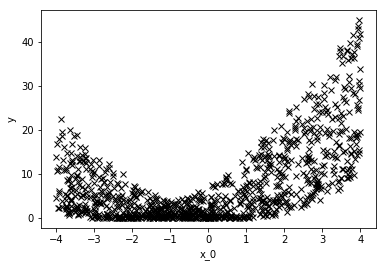

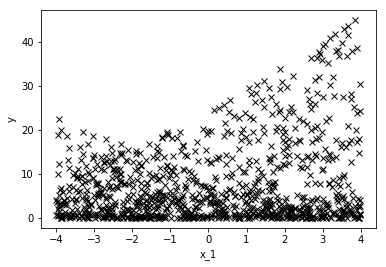

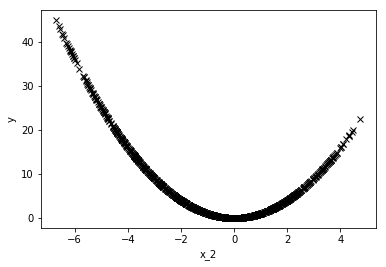

In [7]:
for i in range(len(x)):
    plt.plot(x[i], y, 'kx')
    plt.xlabel('x_{}'.format(i))
    plt.ylabel('y')
    plt.show()

-----------------------------------------------

# Helper Functions

In [20]:
def set_array(inps):
    '''
    @param inps: sliced data frame
    Converts dataframe into numpy array for easy work out
    '''
    inps = np.asarray(inps)
    #squeeze to remove indexing column from pandas
    return np.squeeze(inps)

def sq_loss(y_true, y_pred):
    '''
    Compute sum of squared loss
    @param y_true: array of target values/labels
    @param y_pred: array of predicted values
    
    return: sum of squared loss
    '''
    #squaring loss
    sq = (y_true - y_pred)**2 
    return np.sum(sq)

def abs_loss(y_true, y_pred):
    '''
    Compute sum of absolute loss
    @param y_true: array of target values/labels
    @param y_pred: array of predicted values
    
    return: sum of absolute loss
    '''
    abs_dif = np.abs(y_true - y_pred)
    return np.sum(abs_dif)

def grad(x, y, w):
    
    lin_func = w*x
    return np.sum(x*(y - lin_func))

def lin_func(x, y, w):
    stack = np.empty_like(x[0])*0
    for i in range(len(x)):
        stack += w[i]*x[i]
    return stack

In [21]:
w = np.zeros(n_cols)
test = lin_func(x,y,w)

In [9]:
#convert data frames to numpy arrays
for i in range(len(x)):
    x[i] = set_array(x[i])
    print("Header for x_{}, is {}".format(i,x[i][:5]))
y = set_array(y)

print("Header for y is", y[:5])

Header for x_0, is [-3.4  -3.11 -0.12  0.08  0.2 ]
Header for x_1, is [-0.61  3.85 -2.72 -0.53 -3.86]
Header for x_2, is [ 2.738       0.36666667  0.44266667 -0.77933333  0.65466667]
Header for y is [7.496644   0.13444444 0.19595378 0.60736044 0.42858844]


In [11]:
grad_in = np.dot(x[0].transpose(),y)
w1 = 0.0001*(grad_in)
print(w1)

1.0781798753227594


In [31]:
lr = 0.0001
steps = 0
while steps<=70:
    for i in range(len(x)):
        if steps == 0:
            w = np.zeros(n_cols)
        else:
            w[i] += lr*grad(x[i], y, w[i])
            
        y_pred = w[0]*x[0] + w[1]*x[1] + w[2]*x[2]
        loss = abs_loss(y, y_pred)
    
    print("steps:{}, loss:{}".format(steps,loss.round(4)))
    print("w_0: {}, w_1:{}, w_2:{}".format(w[0].round(4), w[1].round(4), w[2].round(4)))
    print()
    steps+=1



steps:0, loss:7475.3149
w_0: 0.0, w_1:0.0, w_2:0.0

steps:1, loss:6107.467
w_0: 1.0782, w_1:0.5226, w_2:-2.0297

steps:2, loss:6527.1703
w_0: 1.5748, w_1:0.7625, w_2:-2.5421

steps:3, loss:6849.9163
w_0: 1.8035, w_1:0.8727, w_2:-2.6715

steps:4, loss:6996.1484
w_0: 1.9088, w_1:0.9233, w_2:-2.7042

steps:5, loss:7061.8724
w_0: 1.9573, w_1:0.9465, w_2:-2.7124

steps:6, loss:7090.9392
w_0: 1.9797, w_1:0.9572, w_2:-2.7145

steps:7, loss:7103.8831
w_0: 1.99, w_1:0.9621, w_2:-2.715

steps:8, loss:7109.7243
w_0: 1.9947, w_1:0.9643, w_2:-2.7152

steps:9, loss:7112.3838
w_0: 1.9969, w_1:0.9653, w_2:-2.7152

steps:10, loss:7113.602
w_0: 1.9979, w_1:0.9658, w_2:-2.7152

steps:11, loss:7114.1635
w_0: 1.9983, w_1:0.966, w_2:-2.7152

steps:12, loss:7114.4215
w_0: 1.9986, w_1:0.9661, w_2:-2.7152

steps:13, loss:7114.5402
w_0: 1.9987, w_1:0.9662, w_2:-2.7152

steps:14, loss:7114.5948
w_0: 1.9987, w_1:0.9662, w_2:-2.7152

steps:15, loss:7114.6199
w_0: 1.9987, w_1:0.9662, w_2:-2.7152

steps:16, loss:711

In [71]:
def grad_02(x, y, w):
    for i in range(len(x)):
        lin_func += w[i]*x[i]
    return np.sum(x*(y - lin_func))

In [70]:
test = np.dot(x[0].transpose(),y)
print(0.0001*test)

1.0781798753227594


In [62]:
for i in range(len(x)):
    w[i] = lr*grad_02(x[i], y, w = 0)
    print(w[i])

1.0781798753227594
0.5225737666864967
-2.029710776890493


In [76]:
np.dot(x[0],y)*0.0001

1.0781798753227594

In [77]:
np.sum(y)*0.0001

0.7475314899103856

In [31]:
# lr = 0.0001

# for i in range(len(x)):
#     w = np.zeros(n_cols)
#     y_pred = w[0]*x[0] + w[1]*x[1] + w[2]*x[2]
#     loss = abs_loss(y, y_pred)

# print("loss:{}".format(loss))

loss:7475.314899103856


In [52]:
threshold = 0.0001
lr = 0.0001 
iters = 0
#list
iters_list = []
w1_list = []
w2_list = []
target_list = []
loss_list = []
steps = 0

while steps <=70:
    for i in range(len(x)):
        if steps == 0:
            w = np.zeros(n_cols)
            #y_pred = np.empty_like(y)
        else:
            w[i] += lr*grad(x[i], y, w[i])

        y_pred = w[0]*x[0] + w[1]*x[1] + w[2]*x[2]
        loss = sq_loss(y, y_pred)
        
#     w1_list.append(w1)
#     w2_list.append(w2)
#     target_list.append(y_pred)
#     loss_list.append(loss)
    
    print("Iters: {}, loss:{}".format(steps, loss))
    
    steps+=1 

Iters: 0, loss:131446.90264576484
Iters: 1, loss:87934.90107384686
Iters: 2, loss:104293.04567751166
Iters: 3, loss:113954.2876589289
Iters: 4, loss:118302.01137191539
Iters: 5, loss:120212.72602846504
Iters: 6, loss:121061.67760931383
Iters: 7, loss:121443.70448189636
Iters: 8, loss:121617.18682882801
Iters: 9, loss:121696.41754802605
Iters: 10, loss:121732.72546032339
Iters: 11, loss:121749.39627643029
Iters: 12, loss:121757.05919742987
Iters: 13, loss:121760.58374437597
Iters: 14, loss:121762.20542141044
Iters: 15, loss:121762.95171624419
Iters: 16, loss:121763.29519824087
Iters: 17, loss:121763.45329541137
Iters: 18, loss:121763.52606655238
Iters: 19, loss:121763.55956331309
Iters: 20, loss:121763.574982143
Iters: 21, loss:121763.58207960449
Iters: 22, loss:121763.58534666066
Iters: 23, loss:121763.5868505348
Iters: 24, loss:121763.58754279188
Iters: 25, loss:121763.58786144934
Iters: 26, loss:121763.58800813295
Iters: 27, loss:121763.58807565409
Iters: 28, loss:121763.58810673532
